In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# This is a custom matplotlib style that I use for most of my charts
#plt.style.use('https://gist.githubusercontent.com/rhiever/d0a7332fe0beebfdc3d5/raw/205e477cf231330fe2f265070f7c37982fd3130c/tableau10.mplstyle')



In [28]:
age_gender_data = pd.read_csv('http://www.randalolson.com/wp-content/uploads/us-age-gender-breakdown.csv')
age_gender_data.head(n=21)

,Age_Range,Total_Pop_2010,Males_2010,Females_2010
0,<5,20201362,10319427,9881935
1,5-9,20348657,10389638,9959019
2,10-14,20677194,10579862,10097332
3,15-19,22040343,11303666,10736677
4,20-24,21585999,11014176,10571823
5,25-29,21101849,10635591,10466258
6,30-34,19962099,9996500,9965599
7,35-39,20179642,10042022,10137620
8,40-44,20890964,10393977,10496987
9,45-49,22708591,11209085,11499506


''

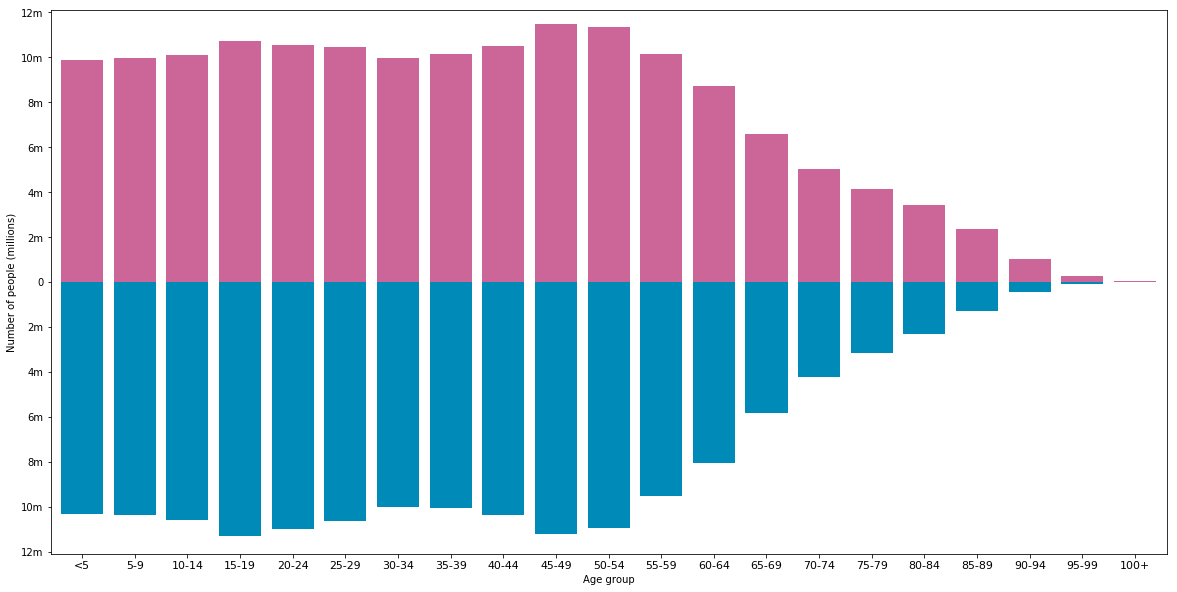

In [58]:
fig = plt.figure(figsize=(20, 10)) #圖的長寬大小
ax1 = fig.add_subplot(111) #subplot(mnk) refers to:  m*n, k=position

for (i, row) in age_gender_data.iterrows(): 
    # Iterate over DataFrame rows as (index=label of the row, Series=data of the row) pairs.
    plt.bar( [i,i] , [row['Females_2010'], -row['Males_2010']],
            color=['#CC6699', '#008AB8'], width=0.8, align='center', edgecolor='none') #.bar(index(位置), value,...)

plt.xlim(-0.6, 20.6) #(xmin, xmax)
plt.ylim(-12.1e6, 12.1e6)
#plt.grid(b=bool, which='major', axis='x',linestyle='-')
plt.xticks(np.arange(0, 21), age_gender_data['Age_Range'], fontsize=11) #(分成幾格、每格的label、)
plt.yticks(np.arange(-12e6, 13e6, 2e6),
           ['{}m'.format(int(abs(x) / 1e6)) if x != 0 else 0 for x in np.arange(-12e6, 13e6, 2e6)])
plt.xlabel('Age group')
plt.ylabel('Number of people (millions)')

#plt.savefig('pop_pyramid_rotated.pdf')
;

''

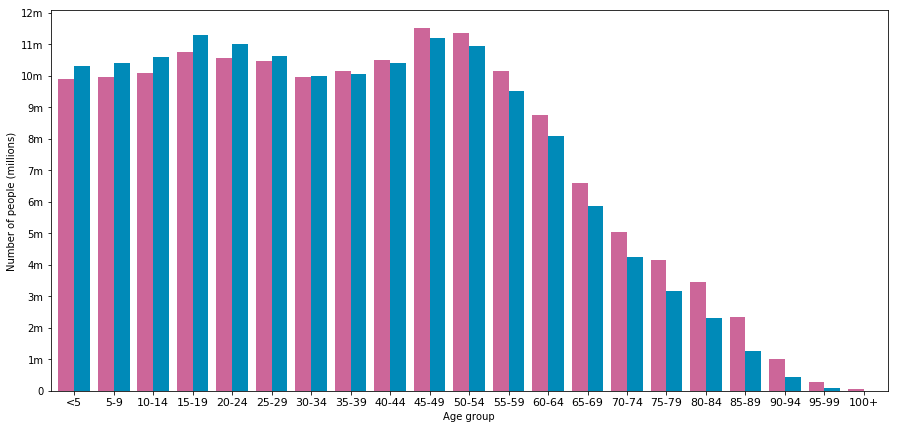

In [61]:
fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(111)

for (i, row) in age_gender_data.iterrows():
    plt.bar([i-0.2 ,i+0.2], [row['Females_2010'], row['Males_2010']],
            color=['#CC6699', '#008AB8'], width=0.4, align='center', edgecolor='none')  #因為定義bar寬度為0.4，所以讓男女bar各自偏移0.2
    
plt.xlim(-0.6, 20.6)
plt.xticks(range(0, 21), age_gender_data['Age_Range'], fontsize=11)
#plt.grid(False, axis='x')
plt.yticks(np.arange(0, 13e6, 1e6),
           ['{}m'.format(int(x / 1e6)) if x > 0 else 0 for x in np.arange(0, 13e6, 1e6)])
plt.xlabel('Age group')
plt.ylabel('Number of people (millions)')


;

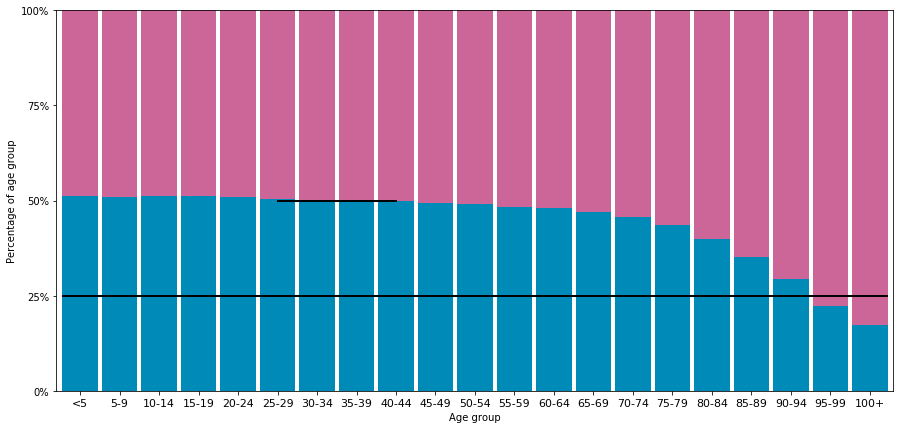

In [67]:
age_gender_data['Male_Pct'] = age_gender_data['Males_2010'] / age_gender_data['Total_Pop_2010']
age_gender_data['Female_Pct'] = age_gender_data['Females_2010'] / age_gender_data['Total_Pop_2010']

plt.figure(figsize=(15, 7))

for (i, row) in age_gender_data.iterrows():
    plt.bar([i], [row['Male_Pct']],
            color=['#008AB8'], width=0.9, align='center', edgecolor='none') #男生照正常的去放
    plt.bar([i], [row['Female_Pct']], bottom=[row['Male_Pct']], #bottom讓女生放在男生上面
            color=['#CC6699'], width=0.9, align='center', edgecolor='none')
    
plt.xlim(-0.6, 20.6)
plt.ylim(0, 1)
plt.xticks(range(0, 21), age_gender_data['Age_Range'], fontsize=11)
plt.grid(False)
plt.yticks(np.arange(0, 1.01, 0.25),
           ['{}%'.format(int(x * 100)) for x in np.arange(0, 1.01, 0.25)])
plt.xlabel('Age group')
plt.ylabel('Percentage of age group')

plt.plot([-0.425, 20.425], [0.5, 0.5], lw=2, color='black') #(range of x, range of y)
plt.plot([-0.425, 20.425], [0.25, 0.25], lw=2, color='black')